In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

import evaluation

import pandas as pd


/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


In [43]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
# exp_dir = 'DQN_single_t4t/'

exp_dir = 'DQN_single_t4td/'

# exp_dir = 'PPO_single_t4t/'

# exp_dir = 'PPO_single_t4td/'

In [44]:
data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')

In [45]:
data1

,ID,gamma,lr,n_step,episode_reward_max,episode_reward_min,episode_reward_mean,coop_frac,final_episode_reward_max,final_episode_reward_mean,final_episode_reward_min,t4t_frac
0,"DQN_MG_t4td_env_f7859_00006_6_gamma=0.99,lr=0....",0.990,0.00010,1.0,"[210.0, 210.0, 220.0, 258.0, 258.0, 258.0, 264...","[69.0, 60.0, 60.0, 60.0, 34.0, 34.0, 34.0, 34....","[128.3, 127.7, 131.53333333333333, 137.525, 14...",0.32,261.0,187.97,103.0,"(0.69,)"
1,"DQN_MG_t4td_env_f7859_00013_13_gamma=0.9,lr=5e...",0.900,0.00005,1.0,"[227.0, 227.0, 227.0, 227.0, 251.0, 251.0, 270...","[105.0, 58.0, 58.0, 58.0, 48.0, 48.0, 48.0, 48...","[158.0, 145.85, 131.6, 129.45, 136.84, 138.983...",0.56,276.0,192.04,101.0,"(0.75,)"
2,"DQN_MG_t4td_env_f7859_00009_9_gamma=0.8,lr=0.0...",0.800,0.00010,1.0,"[228.0, 230.0, 230.0, 246.0, 246.0, 246.0, 275...","[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45....","[149.0, 146.15, 142.03333333333333, 141.675, 1...",0.52,292.0,205.26,100.0,"(0.71,)"
3,"DQN_MG_t4td_env_f7859_00017_17_gamma=0.95,lr=1...",0.950,0.00001,1.0,"[236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236...","[56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56....","[143.2, 159.4, 143.5, 137.85, 141.0, 138.91666...",0.60,268.0,162.80,68.0,"(0.65,)"
4,"DQN_MG_t4td_env_f7859_00036_36_gamma=0.99,lr=1...",0.990,0.00001,5.0,"[221.0, 235.0, 235.0, 235.0, 235.0, 235.0, 235...","[64.0, 64.0, 57.0, 56.0, 56.0, 56.0, 56.0, 56....","[132.4, 136.85, 132.73333333333332, 136.1, 134...",0.67,286.0,170.49,66.0,"(0.56,)"
5,"DQN_MG_t4td_env_f7859_00020_20_gamma=0.999,lr=...",0.999,0.00100,5.0,"[230.0, 237.0, 237.0, 237.0, 240.0, 240.0, 240...","[47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47....","[117.4, 139.45, 150.8, 146.95, 147.86, 147.65,...",0.53,284.0,181.51,38.0,"(0.62,)"
6,"DQN_MG_t4td_env_f7859_00001_1_gamma=0.99,lr=0....",0.990,0.00100,1.0,"[238.0, 238.0, 238.0, 238.0, 238.0, 238.0, 238...","[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55....","[170.0, 147.0, 144.53333333333333, 141.25, 141...",0.42,258.0,187.30,87.0,"(0.58,)"
7,"DQN_MG_t4td_env_f7859_00011_11_gamma=0.99,lr=5...",0.990,0.00005,1.0,"[217.0, 217.0, 217.0, 249.0, 249.0, 249.0, 252...","[83.0, 63.0, 45.0, 37.0, 30.0, 30.0, 30.0, 30....","[143.8, 140.7, 140.3, 143.875, 141.7, 141.9833...",0.32,253.0,194.95,98.0,"(0.62,)"
8,"DQN_MG_t4td_env_f7859_00021_21_gamma=0.99,lr=0...",0.990,0.00100,5.0,"[220.0, 227.0, 227.0, 227.0, 227.0, 253.0, 253...","[57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57....","[146.9, 148.5, 140.4, 138.65, 135.78, 141.1833...",0.62,288.0,194.29,81.0,"(0.76,)"
9,"DQN_MG_t4td_env_f7859_00008_8_gamma=0.9,lr=0.0...",0.900,0.00010,1.0,"[238.0, 238.0, 238.0, 255.0, 255.0, 255.0, 255...","[62.0, 62.0, 62.0, 44.0, 41.0, 41.0, 38.0, 38....","[133.3, 139.25, 146.73333333333332, 147.125, 1...",0.55,293.0,199.58,102.0,"(0.79,)"


In [46]:
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())
n_step_options = sorted(data1['n_step'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan
t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan
coop_frac_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
    
    n_step_i = n_step_options.index(data1.loc[ii].n_step)
    
    ep_mean_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].final_episode_reward_mean
    
    t4t_frac_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].t4t_frac[0]
    coop_frac_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].coop_frac


In [47]:
n_step_options

[1.0, 5.0]

In [48]:
lr_options, gamma_options

([1e-05, 5e-05, 0.0001, 0.001], [0.8, 0.9, 0.95, 0.99, 0.999])

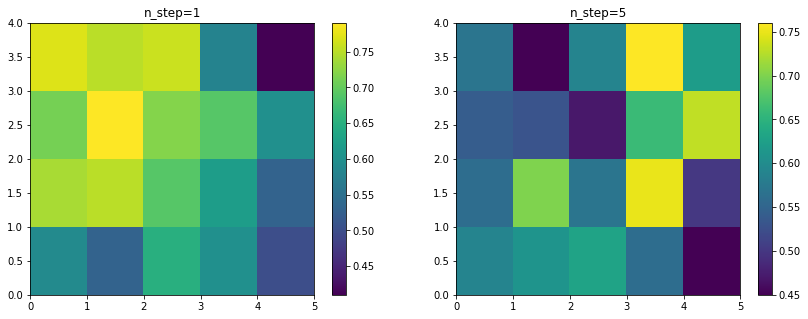

In [49]:
fig = plt.figure(figsize=(14,5))
fig.add_subplot(1,2,1)
plt.pcolor(t4t_frac_arr[:,:,0])
plt.title('n_step=1')
plt.colorbar()

fig.add_subplot(1,2,2)
plt.pcolor(t4t_frac_arr[:,:,1])
plt.title('n_step=5')

plt.colorbar()



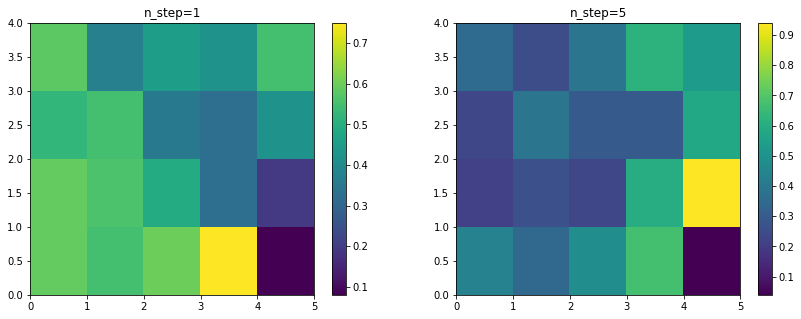

In [50]:
fig = plt.figure(figsize=(14,5))
fig.add_subplot(1,2,1)
plt.pcolor(coop_frac_arr[:,:,0])
plt.title('n_step=1')
plt.colorbar()

fig.add_subplot(1,2,2)
plt.pcolor(coop_frac_arr[:,:,1])
plt.title('n_step=5')

plt.colorbar()



In [51]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'DQN_single_t4t/'

# exp_dir = 'DQN_single_t4td/'

# exp_dir = 'PPO_single_t4t/'

# exp_dir = 'PPO_single_t4td/'
data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')

In [52]:
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())
n_step_options = sorted(data1['n_step'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan
t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan
coop_frac_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
    
    n_step_i = n_step_options.index(data1.loc[ii].n_step)
    
    ep_mean_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].final_episode_reward_mean
    
    t4t_frac_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].t4t_frac[0]
    coop_frac_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].coop_frac


In [53]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
# exp_dir = 'DQN_single_t4t/'

# exp_dir = 'DQN_single_t4td/'

# exp_dir = 'PPO_single_t4t/'

exp_dir = 'PPO_single_t4td/'
data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
    
    
    ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean
    
    t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
    coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac


lr: [1e-05, 5e-05, 0.0001, 0.001]
gamma: [0.8, 0.9, 0.95, 0.99, 0.999]


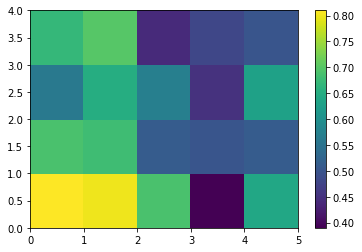

In [54]:
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
plt.pcolor(t4t_frac_arr[:,:])
plt.colorbar()

lr: [1e-05, 5e-05, 0.0001, 0.001]
gamma: [0.8, 0.9, 0.95, 0.99, 0.999]


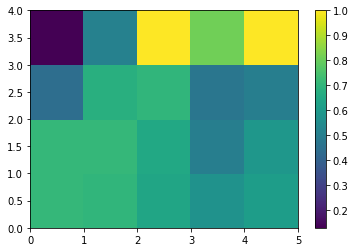

In [55]:
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
plt.pcolor(coop_frac_arr[:,:])
plt.colorbar()

In [56]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
# exp_dir = 'DQN_single_t4t/'

# exp_dir = 'DQN_single_t4td/'

exp_dir = 'PPO_single_t4t/'

# exp_dir = 'PPO_single_t4td/'
data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
    
    
    ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean
    
    t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
    coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac


lr: [1e-05, 5e-05, 0.0001, 0.001]
gamma: [0.8, 0.9, 0.95, 0.99, 0.999]


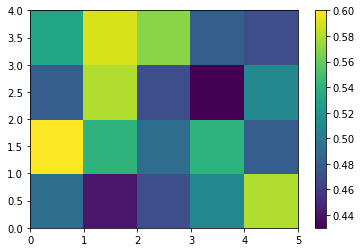

In [57]:
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
plt.pcolor(t4t_frac_arr[:,:])
plt.colorbar()

lr: [1e-05, 5e-05, 0.0001, 0.001]
gamma: [0.8, 0.9, 0.95, 0.99, 0.999]


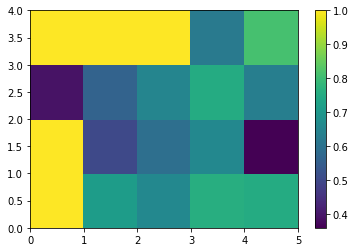

In [58]:
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
plt.pcolor(coop_frac_arr[:,:])
plt.colorbar()